# S&P Historical Data Analysis

We will look at data from August 2007 to November 2017 and analyze moves and trends within the broad S&P index.

### Introduction

I'm looking to develop a trading strategy for SPX, and index that follows the S&P index. SPX is traded with options. We can be the buyer of calls and puts, and we can be the seller of calls and puts. There are always a lot of risks associated with trading options. To offset this risk, we can combine multiple legs to our position (holding positions of both buying and selling a put, for example). We can analyze past data to see how the market has behaved, which can help us make more informed, efficient decisions.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import time
% matplotlib inline

In [106]:
df = pd.read_csv('SP_HistoricalPrices.csv')
df.head()

,Date,Open,High,Low,Close,%Change
0,11/09/17,2584.00,2586.50,2566.33,2584.62,-0.376
1,11/08/17,2588.71,2595.47,2585.02,2594.38,0.144
2,11/07/17,2592.11,2597.02,2584.35,2590.64,-0.019
3,11/06/17,2587.47,2593.38,2585.66,2591.13,0.127
4,11/03/17,2581.93,2588.42,2576.77,2587.84,0.310


## Initial Questions to Investigage

1. Analyze the moves of the index after the market opens?
2. In a bull market, after a significant drop, how has the market responded over the following week?
3. What have been the typical moves over the past 3 years?

## Data Cleaning

1. We want to be able to group by the year. If we can write query with the data itself, then we are ok. Otherwise, we can create a new column
2. Create a column that shows the max moves after the open in both directions, and then a column for the difference. This formulas will be<br>
*MaxUp = (High - Open)/Open*<br>
*MaxDown = (Low - Open)/Open*<br>
*Range = MaxUp - MaxDown*

In [107]:
#Rename Columns to Remove Additional Space
df.rename(columns = {' Open' : 'Open', ' High' : 'High', ' Low' : 'Low', ' Close' : 'Close'}, inplace=True);

In [108]:
#Find the maximum moves after the open as a percentage, and round to 3 decimals
df['MaxUp'] = ((df['High'] - df['Open'])/df['Open']*100).round(3)
df['MaxDown'] = ((df['Low'] - df['Open'])/df['Open']*100).round(3)
df.head()

,Date,Open,High,Low,Close,%Change,MaxUp,MaxDown
0,11/09/17,2584.00,2586.50,2566.33,2584.62,-0.376,0.097,-0.684
1,11/08/17,2588.71,2595.47,2585.02,2594.38,0.144,0.261,-0.143
2,11/07/17,2592.11,2597.02,2584.35,2590.64,-0.019,0.189,-0.299
3,11/06/17,2587.47,2593.38,2585.66,2591.13,0.127,0.228,-0.070
4,11/03/17,2581.93,2588.42,2576.77,2587.84,0.310,0.251,-0.200


In [109]:
#Clean the date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%y")

### Investigate Dataset for Potential Outliers or Missing Data

In [110]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 8 columns):
Date       2583 non-null datetime64[ns]
Open       2583 non-null float64
High       2583 non-null float64
Low        2583 non-null float64
Close      2583 non-null float64
%Change    2583 non-null float64
MaxUp      2583 non-null float64
MaxDown    2583 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 161.5 KB


In [111]:
df.describe()

,Open,High,Low,Close,%Change,MaxUp,MaxDown
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,1594.803926,1603.692652,1585.113736,1595.159063,0.030629,0.637114,-0.687026
std,461.977288,460.943319,463.112645,462.149156,1.290569,0.812455,0.926184
min,679.280000,695.270000,666.790000,676.530000,-9.035000,0.000000,-9.110000
25%,1238.485000,1249.920000,1225.995000,1238.075000,-0.415000,0.132500,-0.901000
50%,1464.050000,1472.060000,1457.150000,1464.070000,0.056000,0.404000,-0.416000
75%,2027.410000,2038.245000,2016.540000,2026.680000,0.561000,0.850500,-0.117500
max,2592.110000,2597.020000,2585.660000,2594.380000,11.580000,10.789000,0.025000


In [112]:
df.query('MaxUp > 5')

,Date,Open,High,Low,Close,%Change,MaxUp,MaxDown
1574,2011-08-11,1121.30,1186.29,1121.30,1172.64,4.629,5.796,0.000
2177,2009-03-23,772.31,823.37,772.31,822.92,7.076,6.611,0.000
2186,2009-03-10,679.28,719.60,679.28,719.60,6.366,5.936,0.000
2257,2008-11-24,801.20,865.60,801.20,851.81,6.472,8.038,0.000
2258,2008-11-21,755.84,801.20,741.02,800.03,6.325,6.001,-1.961
2264,2008-11-13,853.13,913.01,818.69,911.29,6.921,7.019,-4.037
2276,2008-10-28,848.92,940.51,845.27,940.51,10.789,10.789,-0.430
2287,2008-10-13,912.75,1006.93,912.75,1003.35,11.580,10.318,0.000


In [121]:
df.query('MaxDown < -5')

,Date,Open,High,Low,Close,%Change,MaxUp,MaxDown
1577,2011-08-08,1198.48,1198.48,1119.28,1119.46,-6.663,0.000,-6.608
1894,2010-05-06,1164.38,1167.58,1065.79,1128.15,-3.235,0.275,-8.467
1974,2010-01-11,1145.96,1149.74,1047.28,1146.98,0.175,0.330,-8.611
2205,2009-02-10,866.87,868.05,822.99,827.16,-4.912,0.136,-5.062
2220,2009-01-20,849.64,849.64,804.47,805.22,-5.282,0.000,-5.316
2253,2008-12-01,888.61,888.61,815.69,816.21,-8.930,0.000,-8.206
2259,2008-11-20,805.87,820.52,747.78,752.44,-6.712,1.818,-7.208
2260,2008-11-19,859.03,864.57,806.18,806.58,-6.116,0.645,-6.152
2269,2008-11-06,952.40,952.40,899.73,904.88,-5.026,0.000,-5.530
2270,2008-11-05,1001.84,1001.84,949.86,952.77,-5.268,0.000,-5.188


In [114]:
df.query('Date >= "2008-10-01" and Date <= "2008-10-31"')

,Date,Open,High,Low,Close,%Change,MaxUp,MaxDown
2273,2008-10-31,953.11,984.38,944.59,968.75,1.537,3.281,-0.894
2274,2008-10-30,939.38,963.23,928.50,954.09,2.580,2.539,-1.158
2275,2008-10-29,939.51,969.97,922.26,930.09,-1.108,3.242,-1.836
2276,2008-10-28,848.92,940.51,845.27,940.51,10.789,10.789,-0.430
2277,2008-10-27,874.28,893.78,846.75,848.92,-3.176,2.230,-3.149
2278,2008-10-24,895.22,896.30,852.85,876.77,-3.451,0.121,-4.733
2279,2008-10-23,899.08,922.83,858.44,908.11,1.263,2.642,-4.520
2280,2008-10-22,951.67,951.67,875.81,896.78,-6.101,0.000,-7.971
2281,2008-10-21,980.40,985.44,952.47,955.05,-3.080,0.514,-2.849
2282,2008-10-20,943.51,985.40,943.51,985.40,4.768,4.440,0.000


In [116]:
df.query('MaxUp > .5 and MaxDown < -.5 and Date > "2010-01-01"')

,Date,Open,High,Low,Close,%Change,MaxUp,MaxDown
251,2016-11-10,2167.49,2182.30,2151.17,2167.48,0.195,0.683,-0.753
304,2016-08-26,2175.10,2187.94,2160.39,2169.04,-0.158,0.590,-0.676
354,2016-06-16,2066.36,2079.62,2050.37,2077.99,0.313,0.642,-0.774
407,2016-04-01,2056.62,2075.07,2043.98,2072.78,0.633,0.897,-0.615
422,2016-03-10,1990.97,2005.08,1969.25,1989.57,0.016,0.709,-1.091
430,2016-02-29,1947.13,1958.27,1931.81,1932.23,-0.812,0.572,-0.787
433,2016-02-24,1917.56,1932.08,1891.00,1929.80,0.444,0.757,-1.385
443,2016-02-09,1848.46,1868.25,1834.94,1852.21,-0.066,1.071,-0.731
446,2016-02-04,1911.67,1927.35,1900.52,1915.45,0.153,0.820,-0.583
447,2016-02-03,1907.07,1918.01,1872.23,1912.53,0.499,0.574,-1.827


In [156]:
df_bear = df.query('Date < "2009-04-01"')
df_bull = df.query('Date >= "2009-04-01"')

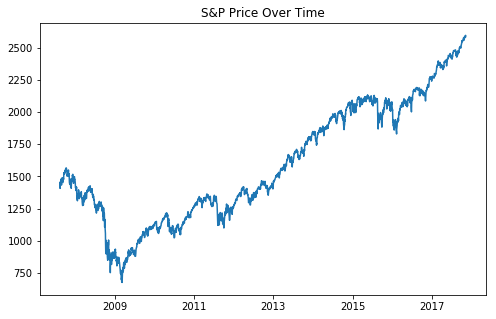

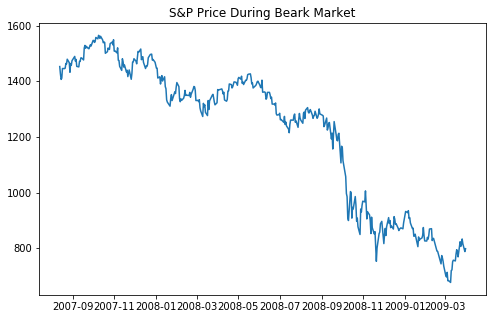

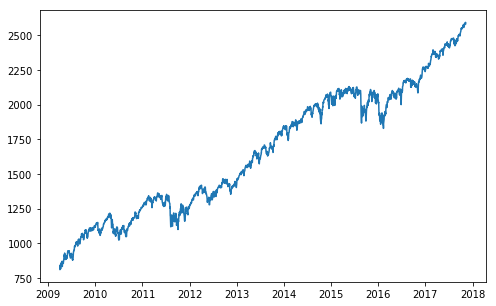

In [175]:

plt.figure(figsize=(8,5))
plt.plot(df['Date'],df['Close']);
plt.title('S&P Price Over Time')

plt.figure(figsize=(8,5))
plt.plot(df_bear['Date'],df_bear['Close']);
plt.title('S&P Price During Beark Market')

plt.figure(figsize=(8,5))
plt.plot(df_bull['Date'],df_bull['Close']);
plt.show()

#### We are clearly in a bull market. We can't predict the turn to a bear market (cause could vary from politics, international affairs, economic conditions, and unforeseen factors), so we should assume a bull market until we see clear direction change.

In [177]:
df_bull.describe()

,Open,High,Low,Close,%Change,MaxUp,MaxDown
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000
mean,1665.119567,1673.316568,1656.471064,1665.798379,0.058875,0.540767,-0.560205
std,458.798164,458.521315,458.812407,458.646830,0.970959,0.592841,0.693532
min,793.590000,813.620000,783.320000,811.080000,-6.663000,0.000000,-8.611000
25%,1261.365000,1270.445000,1254.965000,1262.085000,-0.338000,0.125000,-0.751500
50%,1657.410000,1664.850000,1652.610000,1656.780000,0.060000,0.372000,-0.359000
75%,2067.170000,2076.950000,2056.580000,2067.295000,0.523500,0.759500,-0.098500
max,2592.110000,2597.020000,2585.660000,2594.380000,4.741000,5.796000,0.025000
